In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from statsmodels.formula.api import ols
import statsmodels.api as sm
import io

from scipy.stats import norm
from scipy import stats
from sklearn import metrics



from sklearn.model_selection import train_test_split


In [2]:
def fn_plot_res(y,x):
    res =  y - x
    Zeros = y * 0
    plt.figure(figsize=(15, 5))
    ax = plt.axes()
    ax.scatter(x,res)
    ax.plot(x, Zeros,color = 'red')
    ax.set_xlim(min(x),max(x))
    ax.set_ylim(-1*max(res),1.1*max(res))
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')    
    
def fn_bias_rmse(y,yhat):
    """
    theta0 - true parameter value
    thetatahat - estimated parameter value
    se_thetahat - estiamted se of thetahat
    """
    n = len(yhat)
    res =  y - yhat
    bias = np.mean(res)
    rmse = np.sqrt(np.mean(res**2))
    MSE = np.mean(res**2)
    MAPE = np.mean(np.abs((y - yhat) / y)) * 100
    return (bias,rmse,MSE,MAPE) 

In [21]:
df = pd.read_csv("/Users/shuhuisun/Downloads/EC584/584_final_project/Filtered_Data.csv")
df3 = pd.read_csv("/Users/shuhuisun/Downloads/EC584/584_final_project/Filtered_Data_V4.csv")


In [26]:
df['log_Total_population'] = np.log(df.Total_population_2021)  
df['log_Median_age'] = np.log(df.Median_age)  
df['log_Households_Median_income'] = np.log(df.Households_Median_income_2021)  
df['log_Violent_Crime'] = np.log(df.Violent_Crime)  
df['log_avg_housing_price'] = np.log(df.avg_housing_price)   
df['log_avg_apt_price'] = np.log(df.avg_apt_price)  
df['Competitors_Dummy'] =  (df['Combined_Competitors']>0).astype(int)
df['Crime_Rate'] =df['Violent_Crime']/ df['Total_population_2021'] *1000
df['log_Density_per_sq_km'] = np.log(df.Density_per_sq_km)  
df['log_unemployment_rate'] = np.log(df.unemployment_Rate)
df['log_number_of_households'] = np.log(df.Number_of_Households)


In [27]:
df3['log_Total_population'] = np.log(df3.Total_population_2021)  
df3['log_Median_age'] = np.log(df3.Median_age)  

df3['log_Households_Median_income'] = np.log(df3.Households_Median_income_2021)  
df3['log_Violent_Crime'] = np.log(df3.Violent_Crime)  
df3['log_avg_housing_price'] = np.log(df3.avg_housing_price)   
df3['log_avg_apt_price'] = np.log(df3.avg_apt_price)  
df3['Competitors_Dummy'] =  (df3['Combined_Competitors']>0).astype(int)
df3['Crime_Rate'] =df3['Violent_Crime']/ df3['Total_population_2021'] *1000
df3['log_Density_per_sq_km'] = np.log(df3.Density_per_sq_km)  
df3['log_Public_Transit'] = np.log(df3.Public_Transit)  
df3['log_AADT'] = np.log(df3.AADT)  
df3['AADT_share'] = df3['AADT']/ df3['Total_population_2021']



In [25]:
df.columns

Index(['ZIPCODE', 'wholeFoods', 'wholeFoods_Dummy', 'ralphs', 'traderJoes',
       'bristolFarms', 'Combined_Competitors', 'Total_population_2021',
       'One_year_population_growth', 'Two_years_population_growth',
       'Three_years_population_growth', 'Four_years_population_growth',
       'White', 'Black', 'Asian', 'Native_American', 'Native_Hawaiian',
       'Other', 'Median_age', 'Number_of_Households',
       'Households_Median_income_2021', 'One_year_income_growth',
       'Two_years_income_growth', 'Three_years_income_growth',
       'Four_years_income_growth', 'unemployment_Rate', 'Violent_Crime',
       'avg_housing_price', 'avg_apt_price', 'foreclosures', 'Area_sq_meters',
       'Area_sq_km', 'Density_per_sq_km', 'log_Total_population',
       'log_Median_age', 'log_Households_Median_income', 'log_Violent_Crime',
       'log_avg_housing_price', 'log_avg_apt_price', 'Competitors_Dummy',
       'Crime_Rate', 'log_Density_per_sq_km'],
      dtype='object')

In [30]:
regressors = [ 'ralphs', 'traderJoes' , 'bristolFarms', 'log_Total_population', 'log_Median_age', 'log_number_of_households','log_Households_Median_income', 'log_unemployment_rate', 'log_Violent_Crime', 'log_avg_apt_price', 'log_avg_housing_price','Four_years_population_growth','Four_years_income_growth']
X = df[regressors]
y = df.wholeFoods_Dummy

logit_model = sm.Logit(y, sm.add_constant(X)).fit()
preds = logit_model.predict()
sum = logit_model.summary()

#export model
with open("logit_.csv", "w") as f:
    f.write(str(sum))

Optimization terminated successfully.
         Current function value: 0.216155
         Iterations 8


### ____    
.     
..    
#### City Level 
Combined_Competitors	& Population Density.   
Logit model with Logs >>> SD outliers (Income and Population)   
..    
.    

In [6]:
df4 = df3.copy()
df4 = df4.loc[~(df4.AADT==0)]
df3

,City,wholeFoods,wholeFoods_Dummy,ralphs,traderJoes,bristolFarms,Combined_Competitors,Total_population_2021,Total population 2019,Total population 2017,...,log_Median_age,log_Households_Median_income,log_Violent_Crime,log_avg_housing_price,log_avg_apt_price,Competitors_Dummy,log_Density_per_sq_km,log_Public_Transit,log_AADT,AADT_share
0,Agoura Hills,0,0,1,1,0,2,25737,26334,26028,...,3.797734,11.864828,3.449988,14.100432,8.071531,1,5.675006,0.000000,13.661193,33.298364
1,Alhambra,0,0,0,0,0,0,83199,84335,85065,...,3.724488,11.197070,5.817111,13.731786,7.635787,0,8.346102,1.098612,14.357195,20.660104
2,Altadena,0,0,0,0,0,0,36867,37818,37528,...,3.797734,11.649796,6.070738,14.023876,7.824846,0,7.450686,1.098612,13.350295,17.034204
3,Arcadia,0,0,1,0,0,1,66188,67074,67557,...,3.769307,11.518689,5.147494,14.164421,7.793587,1,7.674026,1.098612,13.713478,13.642956
4,Artesia,0,0,0,0,0,0,16390,16801,16912,...,3.648057,11.330456,4.634729,13.536200,7.760467,0,8.264184,0.693147,13.149979,31.360586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,West Hollywood,0,0,0,1,0,1,20185,20230,20401,...,3.775057,11.497203,9.656403,14.969037,8.071531,1,8.212360,1.098612,-inf,0.000000
112,Whittier,0,0,2,1,0,3,193207,195308,196990,...,3.606856,11.341479,7.062477,13.533844,7.711251,1,7.753384,1.098612,13.743477,4.816078
113,Wilmington,0,0,0,0,0,0,57030,56880,56779,...,3.453157,10.917649,9.658865,13.380038,7.571474,0,7.878950,1.791759,13.229422,9.758022
114,Winnetka,0,0,0,0,0,0,49260,49678,49551,...,3.618993,11.259284,10.340322,13.633171,7.653495,0,8.432924,1.791759,-inf,0.000000


In [7]:
df4 = df4.reset_index(drop=True)
df4

,City,wholeFoods,wholeFoods_Dummy,ralphs,traderJoes,bristolFarms,Combined_Competitors,Total_population_2021,Total population 2019,Total population 2017,...,log_Median_age,log_Households_Median_income,log_Violent_Crime,log_avg_housing_price,log_avg_apt_price,Competitors_Dummy,log_Density_per_sq_km,log_Public_Transit,log_AADT,AADT_share
0,Agoura Hills,0,0,1,1,0,2,25737,26334,26028,...,3.797734,11.864828,3.449988,14.100432,8.071531,1,5.675006,0.000000,13.661193,33.298364
1,Alhambra,0,0,0,0,0,0,83199,84335,85065,...,3.724488,11.197070,5.817111,13.731786,7.635787,0,8.346102,1.098612,14.357195,20.660104
2,Altadena,0,0,0,0,0,0,36867,37818,37528,...,3.797734,11.649796,6.070738,14.023876,7.824846,0,7.450686,1.098612,13.350295,17.034204
3,Arcadia,0,0,1,0,0,1,66188,67074,67557,...,3.769307,11.518689,5.147494,14.164421,7.793587,1,7.674026,1.098612,13.713478,13.642956
4,Artesia,0,0,0,0,0,0,16390,16801,16912,...,3.648057,11.330456,4.634729,13.536200,7.760467,0,8.264184,0.693147,13.149979,31.360586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Torrance,1,1,1,2,0,3,176859,174988,177157,...,3.719409,11.458461,10.768443,13.862081,7.769801,1,7.978672,0.000000,14.442518,10.584703
86,West Covina,0,0,0,0,0,0,111557,108460,109698,...,3.688046,11.413418,6.752854,13.588137,7.758191,0,7.882576,1.098612,14.823833,24.570399
87,Whittier,0,0,2,1,0,3,193207,195308,196990,...,3.606856,11.341479,7.062477,13.533844,7.711251,1,7.753384,1.098612,13.743477,4.816078
88,Wilmington,0,0,0,0,0,0,57030,56880,56779,...,3.453157,10.917649,9.658865,13.380038,7.571474,0,7.878950,1.791759,13.229422,9.758022


In [9]:
regressors = [ 'log_Total_population','ralphs', 'traderJoes' , 'log_Violent_Crime' ,'Edu']
# regressors = [ 'log_Total_population','ralphs', 'traderJoes' , 'log_Violent_Crime' ,'Edu', 'log_avg_apt_price', 'log_Households_Median_income']
X = df3[regressors]
y = df3.wholeFoods_Dummy 

logit_model = sm.Logit(y, sm.add_constant(X)).fit()
preds = logit_model.predict()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.141680
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       wholeFoods_Dummy   No. Observations:                  116
Model:                          Logit   Df Residuals:                      110
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                  0.6321
Time:                        16:44:50   Log-Likelihood:                -16.435
converged:                       True   LL-Null:                       -44.669
Covariance Type:            nonrobust   LLR p-value:                 6.511e-11
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -45.4539     14.468     -3.142      0.002     -73.811     -17.097
log_Total_population     2.6472      1.069      2.475      0.013       0.551       4.743
ralphs                   1.5521      0.796      1.950      0.051      -0.008       3.112
traderJoes              -1.4932      0.787     -1.897      0.058      -3.036       0.049
log_Violent_Crime        0.5823      0.198      2.945      0.003       0.195       0.970
Edu                      0.2028      0.061      3.327      0.001       0.083       0.322
========================================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [10]:
(bias,rmse,MSE,MAPE) = fn_bias_rmse(y,preds.round()) # Calculate Bias and RMSE
print(f' Bias={bias}, \n RMSE={rmse}, \n MSE={MSE}')

 Bias=0.008620689655172414, 
 RMSE=0.20761369963434992, 
 MSE=0.04310344827586207


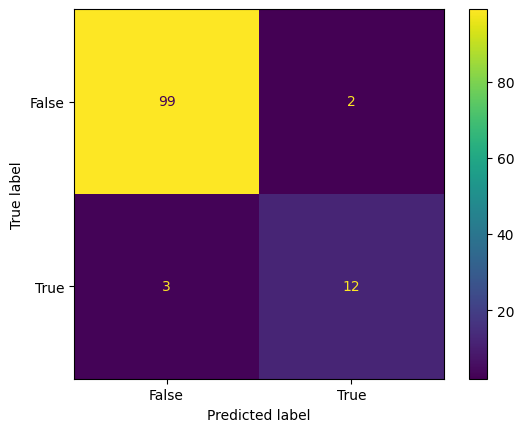

In [11]:
confusion_matrix = metrics.confusion_matrix(y, preds.round())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


In [12]:
print(preds)

[1.42478613e-02 7.59788103e-03 6.13963671e-03 4.06531124e-01
 1.52078502e-05 2.34226124e-04 3.97166125e-05 2.42673883e-05
 2.44437016e-04 8.57929734e-01 9.71175323e-01 1.88743259e-02
 4.70250436e-03 2.02294538e-04 1.59683750e-02 5.13215852e-02
 1.20427966e-02 4.55839862e-03 3.79788389e-04 1.65488773e-03
 7.81605732e-01 8.62622310e-02 6.80327037e-02 6.16148028e-05
 1.01592123e-04 2.85725920e-02 2.37920050e-01 5.75990703e-02
 9.86187357e-01 4.29299079e-03 1.92429966e-02 7.85455336e-04
 9.27420083e-05 2.11484755e-07 7.17333418e-03 5.58998237e-02
 1.12410086e-05 3.03809438e-02 4.44054090e-02 1.39522931e-03
 4.60210140e-04 1.22241546e-04 1.02823513e-03 5.14931892e-02
 8.04062781e-03 3.85839381e-05 4.30368604e-07 3.06072988e-03
 9.73352602e-01 1.00000000e+00 2.04120759e-05 7.19022256e-01
 1.76337342e-01 1.19792775e-01 3.47759632e-07 3.86354548e-05
 1.86286361e-04 9.78087439e-05 3.32428820e-02 2.35125052e-05
 2.15136251e-03 1.49394082e-03 8.22211181e-03 6.74735371e-02
 4.43703087e-04 7.907054

In [12]:
# regressors = [ 'log_Density_per_sq_km','ralphs', 'traderJoes' , 'log_Violent_Crime' ,'Edu', 'log_avg_apt_price', 'log_Households_Median_income']
# # regressors = [ 'Competitors_Dummy' , 'log_Median_age', 'log_Households_Median_income', 'log_Violent_Crime','log_avg_housing_price']

# X = df3[regressors] 
# y = df3.wholeFoods_Dummy 

# logit_model = sm.Logit(y, sm.add_constant(X)).fit()
# logit_model.summary()

In [13]:
# regressors = [ 'log_Total_population','ralphs', 'traderJoes','AADT_share' , 'log_Violent_Crime',  ,'Edu']
# # regressors = [ 'Competitors_Dummy' , 'log_Median_age', 'log_Households_Median_income', 'log_Violent_Crime','log_avg_housing_price']

# X = df4[regressors] 
# y = df4.wholeFoods_Dummy 

# logit_model = sm.Logit(y, sm.add_constant(X)).fit()
# logit_model.summary()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df3[regressors], df3.wholeFoods_Dummy, test_size=0.20,  random_state=31)


In [15]:
regressors = [ 'log_Total_population','ralphs', 'traderJoes' , 'log_Violent_Crime' ,'Edu']
# regressors = [ 'log_Total_population','ralphs', 'traderJoes' , 'log_Violent_Crime' ,'Edu', 'log_Households_Median_income', 'Public_Transit']


logit_model = sm.Logit(y_train, sm.add_constant(X_train[regressors])).fit()
train_preds = logit_model.predict()

logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.132987
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       wholeFoods_Dummy   No. Observations:                   92
Model:                          Logit   Df Residuals:                       86
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                  0.6566
Time:                        12:12:45   Log-Likelihood:                -12.235
converged:                       True   LL-Null:                       -35.624
Covariance Type:            nonrobust   LLR p-value:                 6.307e-09
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -59.1578     22.048     -2.683      0.007    -102.370     -15.945
log_Total_population     3.9247      1.683      2.332      0.020       0.625       7.224
ralphs                   1.7822      1.000      1.783      0.075      -0.177       3.741
traderJoes              -2.0878      1.133     -1.842      0.065      -4.309       0.133
log_Violent_Crime        0.4249      0.219      1.936      0.053      -0.005       0.855
Edu                      0.2327      0.083      2.799      0.005       0.070       0.396
========================================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [16]:
test_preds = logit_model.predict(sm.add_constant(X_test[regressors]))


In [17]:
(bias,rmse,MSE,MAPE) = fn_bias_rmse(y_test,test_preds.round()) # Calculate Bias and RMSE
print(f' Bias={bias}, \n RMSE={rmse}, \n MSE={MSE}')

 Bias=-0.041666666666666664, 
 RMSE=0.3535533905932738, 
 MSE=0.125


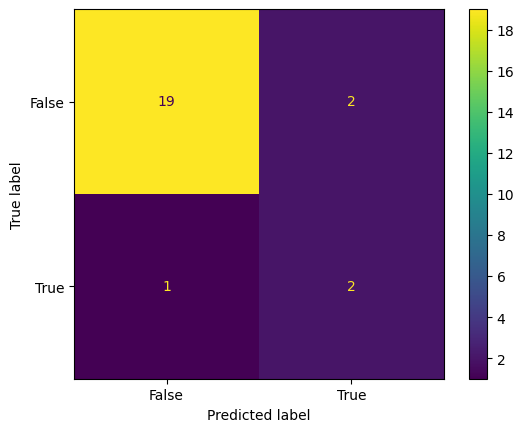

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, test_preds.round())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [19]:
#Compare the strategy with Trader Joes and ralphs

In [20]:
print(df3)
df3.columns

               City  wholeFoods  wholeFoods_Dummy  ralphs  traderJoes  \
0      Agoura Hills           0                 0       1           1   
1          Alhambra           0                 0       0           0   
2          Altadena           0                 0       0           0   
3           Arcadia           0                 0       1           0   
4           Artesia           0                 0       0           0   
..              ...         ...               ...     ...         ...   
111  West Hollywood           0                 0       0           1   
112        Whittier           0                 0       2           1   
113      Wilmington           0                 0       0           0   
114        Winnetka           0                 0       0           0   
115  Woodland Hills           1                 1       0           0   

     bristolFarms  Combined_Competitors  Total_population_2021  \
0               0                     2                  

Index(['City', 'wholeFoods', 'wholeFoods_Dummy', 'ralphs', 'traderJoes',
       'bristolFarms', 'Combined_Competitors', 'Total_population_2021',
       'Total population 2019', 'Total population 2017',
       'Two_years_population_growth', 'Four_years_population_growth',
       'Median_age', 'Households_Median_income_2021',
       'Households Median income 2019', 'Households Median income 2017',
       'Two_years_income_growth', 'Four_years_income_growth',
       'unemployment_Rate', 'Violent_Crime', 'Crime_Rate', 'avg_housing_price',
       'avg_apt_price', 'Area_sq_km', 'Density_per_sq_km', 'AADT',
       'Public_Transit', 'Edu', 'log_Total_population', 'log_Median_age',
       'log_Households_Median_income', 'log_Violent_Crime',
       'log_avg_housing_price', 'log_avg_apt_price', 'Competitors_Dummy',
       'log_Density_per_sq_km', 'log_Public_Transit', 'log_AADT',
       'AADT_share'],
      dtype='object')

In [21]:
isZeroTraderJoes = df3["traderJoes"]==0
isZeroRalphs = df3["ralphs"]==0
df3["TraderJoes_Dummy"] = 1 - isZeroTraderJoes
df3["Ralphs_Dummy"] = 1 - isZeroRalphs

print(df3)

               City  wholeFoods  wholeFoods_Dummy  ralphs  traderJoes  \
0      Agoura Hills           0                 0       1           1   
1          Alhambra           0                 0       0           0   
2          Altadena           0                 0       0           0   
3           Arcadia           0                 0       1           0   
4           Artesia           0                 0       0           0   
..              ...         ...               ...     ...         ...   
111  West Hollywood           0                 0       0           1   
112        Whittier           0                 0       2           1   
113      Wilmington           0                 0       0           0   
114        Winnetka           0                 0       0           0   
115  Woodland Hills           1                 1       0           0   

     bristolFarms  Combined_Competitors  Total_population_2021  \
0               0                     2                  

In [22]:
regressorsWholeFoods = [ 'log_Total_population','ralphs', 'traderJoes' , 'log_Violent_Crime' ,'Edu']
regressorsTraderJoes = [ 'log_Total_population','ralphs', 'wholeFoods' , 'log_Violent_Crime' ,'Edu']
regressorsRalphs = [ 'log_Total_population','wholeFoods', 'traderJoes' , 'log_Violent_Crime' ,'Edu']

XWholeFoods = df3[regressorsWholeFoods] 
yWholeFoods = df3.wholeFoods_Dummy 

XTraderJoes = df3[regressorsTraderJoes] 
yTraderJoes = df3.TraderJoes_Dummy

XRalphs = df3[regressorsRalphs] 
yRalphs = df3.Ralphs_Dummy

logit_modelWholeFoods = sm.Logit(yWholeFoods, sm.add_constant(XWholeFoods)).fit()
print(logit_modelWholeFoods.summary())

logit_modelTraderJoes = sm.Logit(yTraderJoes, sm.add_constant(XTraderJoes)).fit()
print(logit_modelTraderJoes.summary())

logit_modelRalphs = sm.Logit(yRalphs, sm.add_constant(XRalphs)).fit()
print(logit_modelRalphs.summary())



Optimization terminated successfully.
         Current function value: 0.141680
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:       wholeFoods_Dummy   No. Observations:                  116
Model:                          Logit   Df Residuals:                      110
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                  0.6321
Time:                        12:12:45   Log-Likelihood:                -16.435
converged:                       True   LL-Null:                       -44.669
Covariance Type:            nonrobust   LLR p-value:                 6.511e-11
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -45.4539     14.468     -3.142      0.002     -73.811     -17.09

In [23]:
#Prediction and see which area is underserved

In [24]:
pred = logit_modelWholeFoods.predict()
print(pred)

[1.42478613e-02 7.59788103e-03 6.13963671e-03 4.06531124e-01
 1.52078502e-05 2.34226124e-04 3.97166125e-05 2.42673883e-05
 2.44437016e-04 8.57929734e-01 9.71175323e-01 1.88743259e-02
 4.70250436e-03 2.02294538e-04 1.59683750e-02 5.13215852e-02
 1.20427966e-02 4.55839862e-03 3.79788389e-04 1.65488773e-03
 7.81605732e-01 8.62622310e-02 6.80327037e-02 6.16148028e-05
 1.01592123e-04 2.85725920e-02 2.37920050e-01 5.75990703e-02
 9.86187357e-01 4.29299079e-03 1.92429966e-02 7.85455336e-04
 9.27420083e-05 2.11484755e-07 7.17333418e-03 5.58998237e-02
 1.12410086e-05 3.03809438e-02 4.44054090e-02 1.39522931e-03
 4.60210140e-04 1.22241546e-04 1.02823513e-03 5.14931892e-02
 8.04062781e-03 3.85839381e-05 4.30368604e-07 3.06072988e-03
 9.73352602e-01 1.00000000e+00 2.04120759e-05 7.19022256e-01
 1.76337342e-01 1.19792775e-01 3.47759632e-07 3.86354548e-05
 1.86286361e-04 9.78087439e-05 3.32428820e-02 2.35125052e-05
 2.15136251e-03 1.49394082e-03 8.22211181e-03 6.74735371e-02
 4.43703087e-04 7.907054

In [25]:
print(preds==pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [29]:
df3['Underserve_level'] = df3['wholeFoods_Dummy'] - pred
df3['Underserve_level2'] = df3['wholeFoods'] - pred
print(df3)

               City  wholeFoods  wholeFoods_Dummy  ralphs  traderJoes  \
0      Agoura Hills           0                 0       1           1   
1          Alhambra           0                 0       0           0   
2          Altadena           0                 0       0           0   
3           Arcadia           0                 0       1           0   
4           Artesia           0                 0       0           0   
..              ...         ...               ...     ...         ...   
111  West Hollywood           0                 0       0           1   
112        Whittier           0                 0       2           1   
113      Wilmington           0                 0       0           0   
114        Winnetka           0                 0       0           0   
115  Woodland Hills           1                 1       0           0   

     bristolFarms  Combined_Competitors  Total_population_2021  \
0               0                     2                  

In [32]:
df3.to_excel('underserveData.xlsx', index=False)